In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import matplotlib.ticker as mtick

In [35]:

# File to Load 
house_price_data_to_load="Resources/house_price_index.csv"
state_region_data_to_load="Resources/state_region.csv"
    
# Read School and Student Data File and store into Pandas DataFrames
house_price_data_df = pd.read_csv(house_price_data_to_load)
state_region_data_df=pd.read_csv(state_region_data_to_load)
    
#state_region_data_df.head()
#house_price_data_df.head(12)
state_region_data_df.head()


,no,state Name,place_id,Region,Division
0,2,Alaska,AK,West,Pacific
1,3,Alabama,AL,South,East South Central
2,4,Arkansas,AR,South,West South Central
3,5,Arizona,AZ,West,Mountain
4,6,California,CA,West,Pacific


In [36]:
#state_house_price_df = house_data_df[(house_data_df["level"] == "state")]
state_house_price_df = house_price_data_df.loc[house_price_data_df['level'] == 'State']
#this is the main raw dataset
state_yr_house_price_df = state_house_price_df.loc[house_price_data_df['year'] >= 2014]
#Show HPI growth by year - overall
#state_yr_house_price_df
#my_years = [x for x in range(2014,2025)] 
state_yr_house_price_df_plot1 =  state_yr_house_price_df.groupby(['place_id','year'],as_index=False)['index_nsa'].mean()
#state_yr_house_price_df['national_yearly_index'] = state_yr_house_price_df.groupby(['place_id','year'],as_index=False)['index_nsa'].mean()
#print(len(state_yr_house_price_df_plot1))
#print(len(my_years))
state_yr_house_price_df_plot1.head(12)
#state_yr_house_price_df['national_yearly_index'] = state_yr_house_price_df_plot1.index_nsa.transform('mean')
#df['First Volume/Day'] = g['Volume/Day'].transform('first')
#state_yr_house_price_df_plot1
#print(state_yr_house_price_df.shape)
#state_yr_house_price_df_plot1.head(22)

,place_id,year,index_nsa
0,AK,2014,242.003125
1,AK,2015,250.695000
2,AK,2016,256.083750
3,AK,2017,259.456250
4,AK,2018,263.603125
5,AK,2019,270.712500
6,AK,2020,281.758125
7,AK,2021,308.745000
8,AK,2022,344.183750
9,AK,2023,362.205625


In [37]:
yr_house_price_df_plot =  state_yr_house_price_df_plot1.groupby(['year'],as_index=False)['index_nsa'].mean()
yr_house_price_df_plot

,year,index_nsa
0,2014,243.368493
1,2015,254.415617
2,2016,266.169355
3,2017,279.542827
4,2018,294.731797
5,2019,309.193460
6,2020,329.137247
7,2021,378.164673
8,2022,433.614105
9,2023,457.218354


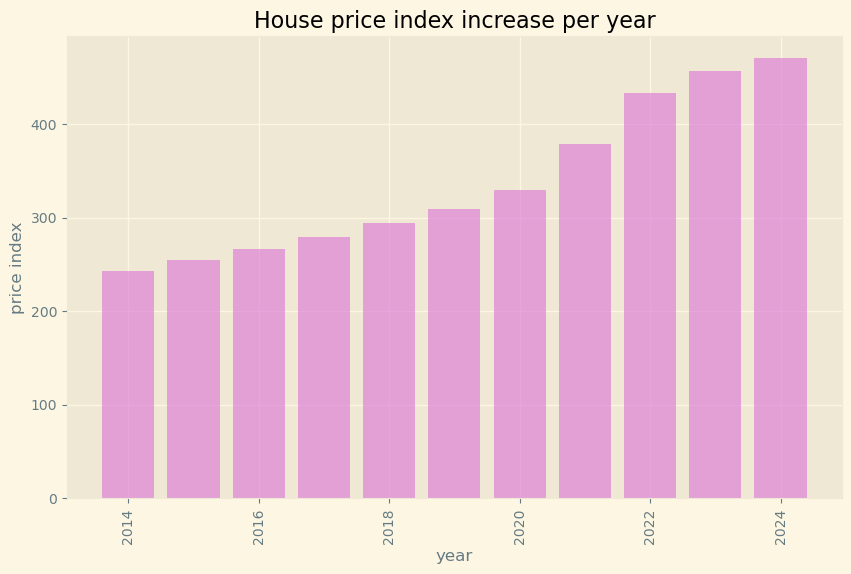

In [38]:
x_axis = yr_house_price_df_plot.year
#print(x_axis)
y_axis= yr_house_price_df_plot.index_nsa
#print(y_axis)
plt.figure(figsize=(10, 6)) 

plot_pyplot =plt.bar(x_axis,y_axis, color='orchid',alpha=0.6, align='center')

# Add labels and title
plt.xlabel('year')
plt.ylabel('price index')
plt.xticks(rotation='vertical')
plt.title('House price index increase per year')

# Display the plot
plt.show()


In [39]:
# Combine the data into a single DataFrame
state_yr_house_price_df.set_index('place_id')
state_yr_house_price_df.head()

Combined_data = state_yr_house_price_df_plot1.merge(state_region_data_df, on='place_id', how='right')
#Combined_data = Combined_data[['Region','place_id','year','index_nsa']]
#Combined_data 
region_yr_house_price_df =  Combined_data.groupby(['Region','year'],as_index=False)['index_nsa'].mean()
region_yr_house_price_df.head(22)
# Display the data table for preview
Combined_data.head(22)

,place_id,year,index_nsa,no,state Name,Region,Division
0,AK,2014,242.003125,2,Alaska,West,Pacific
1,AK,2015,250.695000,2,Alaska,West,Pacific
2,AK,2016,256.083750,2,Alaska,West,Pacific
3,AK,2017,259.456250,2,Alaska,West,Pacific
4,AK,2018,263.603125,2,Alaska,West,Pacific
5,AK,2019,270.712500,2,Alaska,West,Pacific
6,AK,2020,281.758125,2,Alaska,West,Pacific
7,AK,2021,308.745000,2,Alaska,West,Pacific
8,AK,2022,344.183750,2,Alaska,West,Pacific
9,AK,2023,362.205625,2,Alaska,West,Pacific


In [40]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [41]:
def regionwise_HPI():
  sns.lineplot(x='year', y='index_nsa', hue='Region', data = region_yr_house_price_df)
  plt.title('Regionwise House price index  per year')
  plt.figure(figsize=(10, 6))
  plt.style.use('Solarize_Light2')
  #plt.title('Regionwise House price index  per year')
  plt.show()
  return

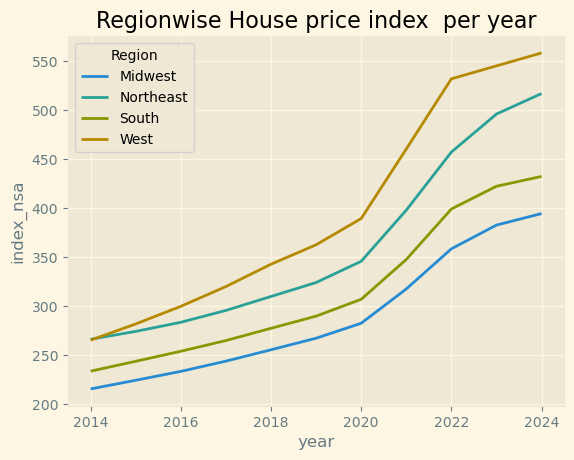

<Figure size 1000x600 with 0 Axes>

In [42]:
regionwise_HPI()

In [43]:
# Setting the path to the shapefile
SHAPEFILE ="Resources/shapefile/cb_2018_us_state_5m.shp"
# Read shapefile using Geopandas
geo_df=gpd.read_file(SHAPEFILE)
geo_df = gpd.read_file(SHAPEFILE)[['GEOID', 'STUSPS', 'NAME','geometry']]
# Rename columns.
geo_df=geo_df.rename(columns={"STUSPS":"place_id"})
geo_df.head(10)

,GEOID,place_id,NAME,geometry
0,31,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,CA,California,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,KY,Kentucky,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,OH,Ohio,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,GA,Georgia,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


In [44]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'Puerto Rico'].index)
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'American Samoa'].index)
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'Commonwealth of the Northern Mariana Islands'].index)
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'Guam'].index)
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'United States Virgin Islands'].index)
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'Alaska'].index)
geo_df = geo_df.drop(geo_df.loc[geo_df['NAME'] == 'Hawaii'].index)
# Print the map
#geo_df.plot(figsize=(200, 200), linewidth=1, color='lightblue')

In [45]:
combined_heat_map_data= Combined_data[Combined_data['year'] == 2023]
combined_heat_map_data= combined_heat_map_data[['place_id','Region','year','index_nsa']]
combined_heat_map_data=combined_heat_map_data.drop_duplicates()
combined_heat_map_data = combined_heat_map_data.reset_index(drop=True)
combined_heat_map_data.head(10)

,place_id,Region,year,index_nsa
0,AK,West,2023,362.205625
1,AL,South,2023,348.524375
2,AR,South,2023,350.158125
3,AZ,West,2023,536.976250
4,CA,West,2023,519.832500
5,CO,West,2023,652.588750
6,CT,Northeast,2023,352.063125
7,DC,South,2023,747.378333
8,DE,South,2023,428.367500
9,FL,South,2023,587.133125


In [46]:
merged_df = pd.merge(left=geo_df, right=combined_heat_map_data, how='left', on='place_id')
df = merged_df.drop(['year'], axis=1)

merged_df.head(50)

,GEOID,place_id,NAME,geometry,Region,year,index_nsa
0,31,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",Midwest,2023,398.535625
1,53,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",West,2023,629.311875
2,35,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",West,2023,388.200625
3,46,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",Midwest,2023,486.631250
4,48,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",South,2023,442.343125
5,06,CA,California,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",West,2023,519.832500
6,21,KY,Kentucky,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",South,2023,372.313750
7,39,OH,Ohio,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",Midwest,2023,329.526875
8,01,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",South,2023,348.524375
9,13,GA,Georgia,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",South,2023,426.908750


In [47]:
# Print the map
# Set the range for the choropleth
def heatmap():
    title = '2023 House price index'
    col = 'index_nsa'
    source = 'HPI = Current HPI by state'
    vmin = df[col].min()
    vmax = df[col].max()
    cmap = 'Oranges'
    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 8))
    # Remove the axis
    ax.axis('off')
    df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
    # Add a title
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    # Create an annotation for the data source
    ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)

            
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    # Empty array for the data range
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)
    return

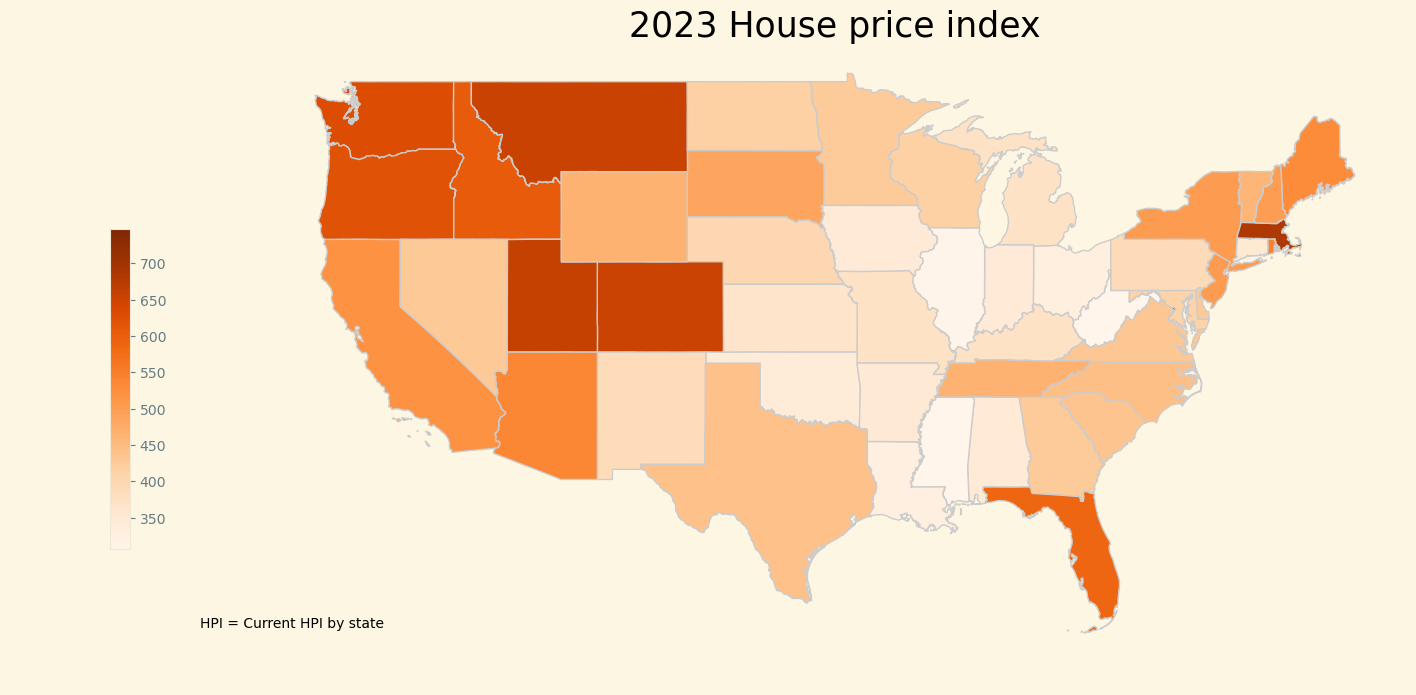

In [48]:
heatmap()

In [49]:
# File to Load 
median_household_income_data_to_load="Resources/income_average.csv"
# Read School and Student Data File and store into Pandas DataFrames
median_household_income_data_df = pd.read_csv(median_household_income_data_to_load)
#median_household_income_data_df.head(50)
Final_median_household_income_data_df = median_household_income_data_df[["Year", "Estimate", "Margin of\nerror1 (±)"]]
Final_median_household_income_data_df=Final_median_household_income_data_df.rename(columns={"Year": "year"})
Final_median_household_income_data_df.head(22)
Final_median_household_income_data_df.dtypes
# convert all DataFrame columns to the int64 dtype
#Final_median_household_income_data_df = Final_median_household_income_data_df.astype(int)

year                     int64
Estimate                 int64
Margin of\nerror1 (±)    int64
dtype: object

In [50]:
final_data = yr_house_price_df_plot.merge(Final_median_household_income_data_df, on='year', how='right') 
final_data = final_data.drop(final_data.loc[final_data['year'] <= 2013].index)
final_data.head(22)

,year,index_nsa,Estimate,Margin of\nerror1 (±)
0,2022,433.614105,74580,968
1,2021,378.164673,70780,606
2,2020,329.137247,68010,880
3,2019,309.193460,68700,904
4,2018,294.731797,63180,691
5,2017,279.542827,61370,551
6,2016,266.169355,59040,718
7,2015,254.415617,56520,528
8,2014,243.368493,53660,645


In [51]:
# Add the linear regression equation and line to plot
def correlation_between_Income_hpi():
    x_values = final_data['index_nsa']
    y_values = final_data['Estimate']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10, 6)) 
    correlation = st.pearsonr(x_values,y_values)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.title('The correlation between Income & house price index')
    plt.xlabel('price index')
    plt.ylabel('income')
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    print(line_eq)
    return


The correlation between both factors is 0.94


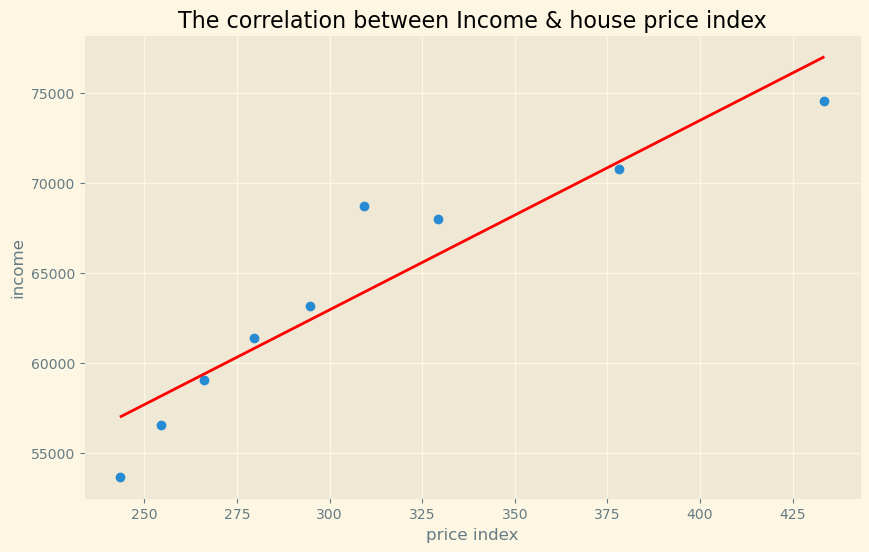

y = 105.41x + 31324.48


In [52]:
correlation_between_Income_hpi()


In [53]:
#yr_house_price_df_plot.set_index('year')
yr_house_price_df_plot1=yr_house_price_df_plot
yr_house_price_df_plot1=yr_house_price_df_plot1.set_index('year')
#yr_house_price_df_plot1
yr_house_price_df_plot1['index_percentage_change'] = yr_house_price_df_plot1.index_nsa.pct_change(periods = 1)
yr_house_price_df_plot1['index_percentage_change'] = yr_house_price_df_plot1['index_percentage_change']*100
yr_house_price_df_plot1.reset_index()

#df.close = df.close.pct_change(periods = 1)

,year,index_nsa,index_percentage_change
0,2014,243.368493,NaN
1,2015,254.415617,4.539258
2,2016,266.169355,4.619896
3,2017,279.542827,5.024422
4,2018,294.731797,5.433504
5,2019,309.193460,4.906720
6,2020,329.137247,6.450262
7,2021,378.164673,14.895739
8,2022,433.614105,14.662774
9,2023,457.218354,5.443607


In [54]:
# File to Load 
inflation_rate_to_load="Resources/inflations_rate.csv"

# Read School and Student Data File and store into Pandas DataFrames
inflation_rate_df = pd.read_csv(inflation_rate_to_load)
sorted_df = inflation_rate_df.sort_values(by=['year'], ascending=True)
#sorted_df 
#inflation_rate_df.sort_values('Year')
Combined_data_1 = yr_house_price_df_plot1.merge(sorted_df, on='year', how='left')
Combined_data_1.head(22)

,year,index_nsa,index_percentage_change,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,2014,243.368493,NaN,1.6,1.1,1.5,2.0,2.1,2.1,2.0,1.7,1.7,1.7,1.3,0.8,1.6
1,2015,254.415617,4.539258,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1
2,2016,266.169355,4.619896,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
3,2017,279.542827,5.024422,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
4,2018,294.731797,5.433504,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
5,2019,309.193460,4.906720,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
6,2020,329.137247,6.450262,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
7,2021,378.164673,14.895739,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
8,2022,433.614105,14.662774,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
9,2023,457.218354,5.443607,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1


In [55]:

Combined_data_1=Combined_data_1.drop(Combined_data_1.loc[Combined_data_1['year'] == 2024].index)
Combined_data_1.at[0,'index_percentage_change'] = 0
def correlation_between_HPI_CPI():
    x_values = Combined_data_1['index_percentage_change']
    y_values = Combined_data_1['Ave']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10, 6)) 
    correlation = st.pearsonr(x_values,y_values)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.title('The correlation between HPI Infation vs CPI Inflation')
    plt.xlabel('House Price Index % Growth')
    plt.ylabel('CPI Inflation')
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    return

The correlation between both factors is 0.79


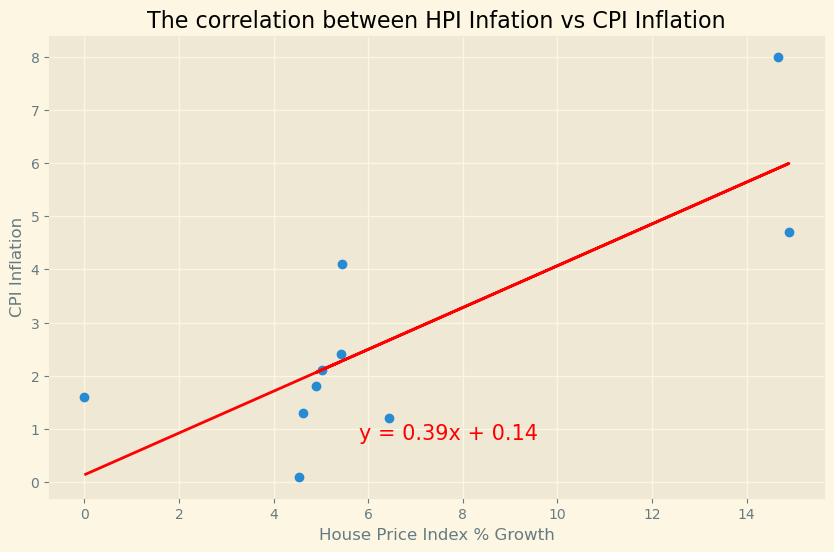

In [56]:
correlation_between_HPI_CPI()

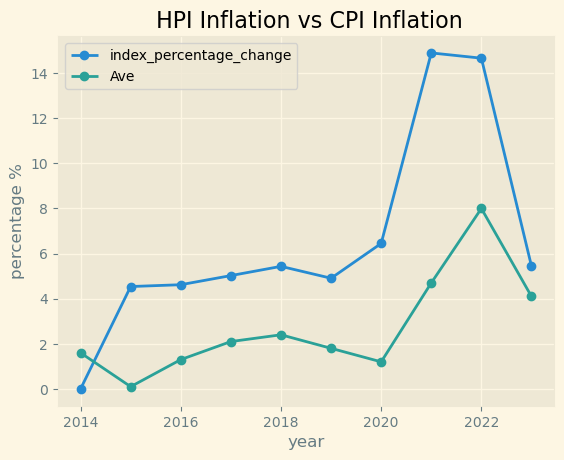

In [57]:
#Line graph for HPI growth and CPI Inflation
HPI_CPI_plot=Combined_data_1[["year","index_percentage_change","Ave"]]
HPI_CPI_plot=HPI_CPI_plot.set_index('year')
plot = HPI_CPI_plot.plot(title=" HPI Inflation vs CPI Inflation",marker='o')
plt.xlabel('year')
plt.ylabel('percentage %')
plt.show()
HPI_CPI_plot = HPI_CPI_plot.reset_index()

In [58]:
import plotly.express as px

HPI_CPI_plot = HPI_CPI_plot.rename(columns={"index_percentage_change": "HPI", "Ave": "CPI"})
def HPI_vs_CPI():
    HPI_CPI_plot_piv = pd.melt(HPI_CPI_plot, 
            id_vars= 'year', 
            value_vars=list(HPI_CPI_plot.columns[1:]), 
            var_name= 'Type', 
            value_name= 'ValuePct')
                          
                          
    HPI_CPI_plot_piv
    fig = px.line(HPI_CPI_plot_piv, x="year", y="ValuePct", color='Type', title = 'HPI Inflation VS CPI Inflation')
    fig.show()
    return

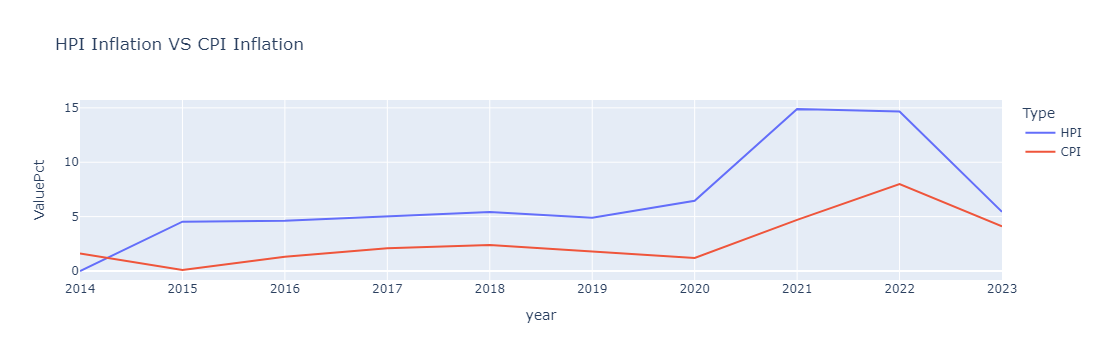

In [59]:
HPI_vs_CPI()

In [60]:
# File to Load 
mortgage_rate_to_load="Resources/MORTgage_rate.csv"

# Read School and Student Data File and store into Pandas DataFrames
mortgage_rate_df = pd.read_csv(mortgage_rate_to_load)
yr_mortgage_rate_df =  mortgage_rate_df.groupby(['year'],as_index=False)['mortgage_rate'].mean()
Combined_data_2 = yr_house_price_df_plot1.merge(yr_mortgage_rate_df, on='year', how='left')
Combined_data_2
#yr_mortgage_rate_df.head(22)
#mortgage_rate_df.head()

,year,index_nsa,index_percentage_change,mortgage_rate
0,2014,243.368493,NaN,4.021905
1,2015,254.415617,4.539258,3.850577
2,2016,266.169355,4.619896,3.654038
3,2017,279.542827,5.024422,3.989808
4,2018,294.731797,5.433504,4.544615
5,2019,309.193460,4.906720,3.935769
6,2020,329.137247,6.450262,3.111698
7,2021,378.164673,14.895739,2.957692
8,2022,433.614105,14.662774,5.344038
9,2023,457.218354,5.443607,6.806731


In [61]:
mortgage_plot = Combined_data_2[["year","index_percentage_change","mortgage_rate"]]
#mortgage_plot
mortgage_plot_f=pd.merge(left=mortgage_plot, right=HPI_CPI_plot, how='left', on='year')
#mortgage_plot_f
mortgage_plot_f = mortgage_plot_f.rename(columns={ "mortgage_rate": "Mortgage Rate"})
#mortgage_plot_f
mortgage_plot_f=mortgage_plot_f.drop(['index_percentage_change'],axis=1)
#mortgage_plot_f
def HPI_inflation_vs_MR_CPI():
    mortgage_plot_piv = pd.melt(mortgage_plot_f, 
                id_vars='year', 
                value_vars=list(mortgage_plot_f.columns[1:]), 
                var_name='Type', 
                value_name='percentage_change')
    mortgage_plot_piv
    fig = px.line(mortgage_plot_piv, x="year", y="percentage_change", color='Type',title='HPI,CPI Inflation VS Mortgage Rate')
    fig.show()
    return

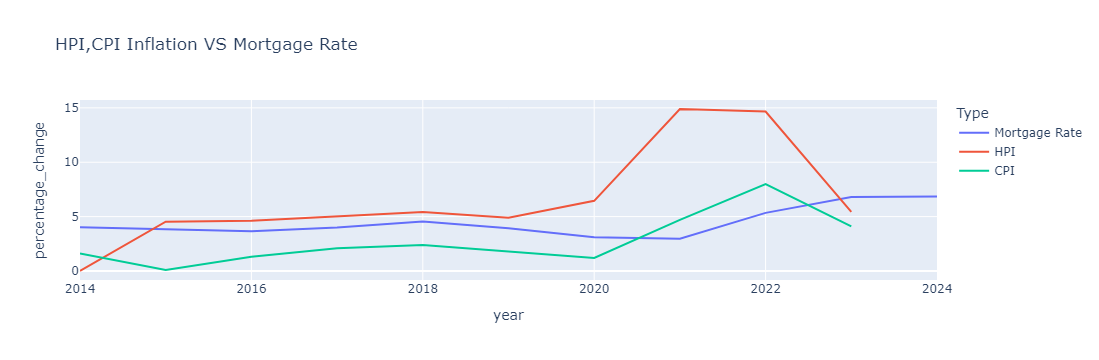

In [62]:
HPI_inflation_vs_MR_CPI()

In [63]:

mortgage_plot_f=mortgage_plot_f.drop(mortgage_plot_f.loc[mortgage_plot_f['year'] == 2024].index)
#mortgage_plot_f
def correlation_cpi_mortgage():
    x_values = mortgage_plot_f['CPI']
    y_values = mortgage_plot_f['Mortgage Rate']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10, 6)) 
    correlation = st.pearsonr(x_values,y_values)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.title('The correlation between CPI Infation vs Mortgage Rate')
    plt.xlabel('CPI Inflation')
    plt.ylabel('Mortgage rate')
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    return


The correlation between both factors is 0.47


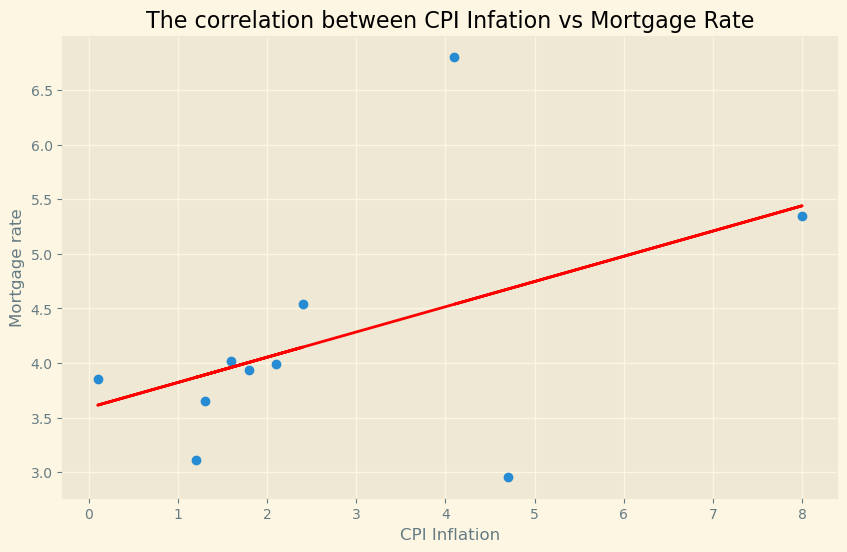

In [64]:
correlation_cpi_mortgage()

In [65]:
Combined_data_2=Combined_data_2.drop(Combined_data_2.loc[Combined_data_2['year'] == 2014].index)
def  hpi_inflation_over_year(): 
  x_axis = Combined_data_2.year
  #print(x_axis)
  y_axis= Combined_data_2.index_percentage_change
  #print(y_axis)
  plt.figure(figsize=(10, 6)) 

  #plot_pyplot =plt.bar(x_axis,y_axis, color='orchid',alpha=0.6, align='center')
  #Combined_data_2['index_percentage_change'] = df['index_percentage_change'].apply(lambda x: (x/df['index_percentage_change'].sum())*100)
  labels = Combined_data_2['index_percentage_change'].round(1).astype('str') + '%'
  ax = Combined_data_2.plot.bar(x='year', y='index_percentage_change', rot=0)
  for container in ax.containers:
      ax.bar_label(container, labels=labels)
      ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
  return    

# Display the plot
#plt.show()

<Figure size 1000x600 with 0 Axes>

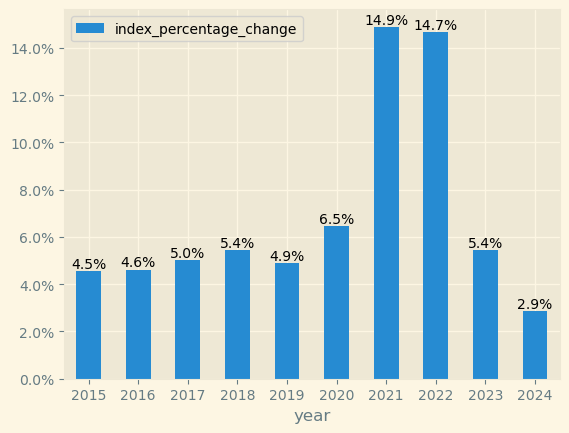

In [66]:
hpi_inflation_over_year()